In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('../TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

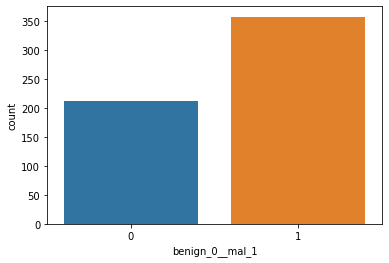

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

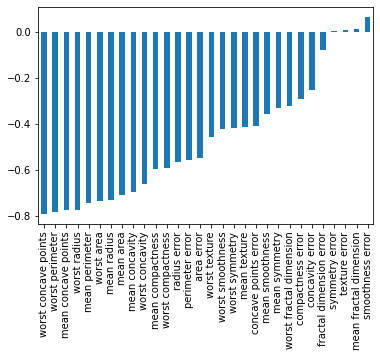

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [8]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [11]:
X_train

array([[1.317e+01, 1.822e+01, 8.428e+01, ..., 1.045e-01, 2.235e-01,
        6.925e-02],
       [1.262e+01, 1.715e+01, 8.062e+01, ..., 9.851e-02, 3.270e-01,
        7.330e-02],
       [1.480e+01, 1.766e+01, 9.588e+01, ..., 8.308e-02, 3.600e-01,
        7.285e-02],
       ...,
       [1.607e+01, 1.965e+01, 1.041e+02, ..., 1.520e-01, 2.650e-01,
        6.387e-02],
       [1.877e+01, 2.143e+01, 1.229e+02, ..., 2.048e-01, 3.679e-01,
        9.870e-02],
       [1.371e+01, 1.868e+01, 8.873e+01, ..., 1.284e-01, 2.849e-01,
        9.031e-02]])

In [12]:
X_test

array([[1.236e+01, 1.854e+01, 7.901e+01, ..., 8.442e-02, 2.983e-01,
        7.185e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       [1.291e+01, 1.633e+01, 8.253e+01, ..., 8.235e-02, 3.024e-01,
        6.949e-02],
       ...,
       [1.760e+01, 2.333e+01, 1.190e+02, ..., 1.996e-01, 2.301e-01,
        1.224e-01],
       [1.162e+01, 1.818e+01, 7.638e+01, ..., 1.416e-01, 2.660e-01,
        9.270e-02],
       [1.550e+01, 2.108e+01, 1.029e+02, ..., 2.134e-01, 3.003e-01,
        1.048e-01]])

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(426, 30)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#output layer
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [22]:
model.fit(x = X_train,y = y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 7s 215ms/step - loss: 0.6735 - val_loss: 0.6450
Epoch 2/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6217 - val_loss: 0.5934
Epoch 3/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5683 - val_loss: 0.5344
Epoch 4/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5282 - val_loss: 0.4787
Epoch 5/600
14/14 [==============================] - 0s 12ms/step - loss: 0.4632 - val_loss: 0.4233
Epoch 6/600
14/14 [==============================] - 0s 15ms/step - loss: 0.4190 - val_loss: 0.3725
Epoch 7/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3582 - val_loss: 0.3267
Epoch 8/600
14/14 [==============================] - 0s 14ms/step - loss: 0.3339 - val_loss: 0.2891
Epoch 9/600
14/14 [==============================] - 0s 13ms/step - loss: 0.2807 - val_loss: 0.2576
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2413 - val_loss: 0.228

14/14 [==============================] - 0s 16ms/step - loss: 0.0546 - val_loss: 0.0912
Epoch 83/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0422 - val_loss: 0.0903
Epoch 84/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0527 - val_loss: 0.0904
Epoch 85/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0460 - val_loss: 0.0975
Epoch 86/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0499 - val_loss: 0.0888
Epoch 87/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0439 - val_loss: 0.0991
Epoch 88/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0529 - val_loss: 0.0882
Epoch 89/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0468 - val_loss: 0.1013
Epoch 90/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0474 - val_loss: 0.0947
Epoch 91/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0395 - val_loss: 0.1021
Epo

14/14 [==============================] - 0s 11ms/step - loss: 0.0466 - val_loss: 0.0956
Epoch 163/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0351 - val_loss: 0.1045
Epoch 164/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0668 - val_loss: 0.0933
Epoch 165/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0281 - val_loss: 0.1110
Epoch 166/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0384 - val_loss: 0.1037
Epoch 167/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0345 - val_loss: 0.1155
Epoch 168/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0402 - val_loss: 0.0993
Epoch 169/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0452 - val_loss: 0.1061
Epoch 170/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0280 - val_loss: 0.1029
Epoch 171/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0315 - val_loss: 0

14/14 [==============================] - 0s 21ms/step - loss: 0.0314 - val_loss: 0.1061
Epoch 243/600
14/14 [==============================] - 0s 23ms/step - loss: 0.0247 - val_loss: 0.1129
Epoch 244/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0328 - val_loss: 0.1097
Epoch 245/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0361 - val_loss: 0.0991
Epoch 246/600
14/14 [==============================] - 0s 25ms/step - loss: 0.0350 - val_loss: 0.1164
Epoch 247/600
14/14 [==============================] - 0s 25ms/step - loss: 0.0301 - val_loss: 0.1035
Epoch 248/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0273 - val_loss: 0.1120
Epoch 249/600
14/14 [==============================] - 0s 27ms/step - loss: 0.0365 - val_loss: 0.1103
Epoch 250/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0396 - val_loss: 0.1084
Epoch 251/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0369 - val_loss: 0

14/14 [==============================] - 0s 14ms/step - loss: 0.0231 - val_loss: 0.1224
Epoch 323/600
14/14 [==============================] - 0s 26ms/step - loss: 0.0217 - val_loss: 0.1172
Epoch 324/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0253 - val_loss: 0.1188
Epoch 325/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0252 - val_loss: 0.1289
Epoch 326/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0259 - val_loss: 0.1229
Epoch 327/600
14/14 [==============================] - 0s 34ms/step - loss: 0.0269 - val_loss: 0.1356
Epoch 328/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0319 - val_loss: 0.1208
Epoch 329/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0357 - val_loss: 0.1125
Epoch 330/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0279 - val_loss: 0.1252
Epoch 331/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0254 - val_loss: 0

14/14 [==============================] - 0s 17ms/step - loss: 0.0238 - val_loss: 0.1437
Epoch 403/600
14/14 [==============================] - 0s 35ms/step - loss: 0.0184 - val_loss: 0.1218
Epoch 404/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0240 - val_loss: 0.1483
Epoch 405/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0170 - val_loss: 0.1462
Epoch 406/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0247 - val_loss: 0.1447
Epoch 407/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0129 - val_loss: 0.1354
Epoch 408/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0285 - val_loss: 0.1417
Epoch 409/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0253 - val_loss: 0.1736
Epoch 410/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0181 - val_loss: 0.1232
Epoch 411/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0198 - val_loss: 0

14/14 [==============================] - 0s 15ms/step - loss: 0.0167 - val_loss: 0.1416
Epoch 483/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0262 - val_loss: 0.2296
Epoch 484/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0306 - val_loss: 0.1382
Epoch 485/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0294 - val_loss: 0.1709
Epoch 486/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0186 - val_loss: 0.1581
Epoch 487/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0098 - val_loss: 0.1622
Epoch 488/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0145 - val_loss: 0.1608
Epoch 489/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0108 - val_loss: 0.1586
Epoch 490/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0103 - val_loss: 0.1594
Epoch 491/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0127 - val_loss: 0

14/14 [==============================] - 0s 14ms/step - loss: 0.0091 - val_loss: 0.2032
Epoch 563/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0153 - val_loss: 0.1575
Epoch 564/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0143 - val_loss: 0.2672
Epoch 565/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0152 - val_loss: 0.1664
Epoch 566/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0140 - val_loss: 0.2263
Epoch 567/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0150 - val_loss: 0.1959
Epoch 568/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0121 - val_loss: 0.2368
Epoch 569/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0171 - val_loss: 0.2010
Epoch 570/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0136 - val_loss: 0.1813
Epoch 571/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0128 - val_loss: 0

In [23]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

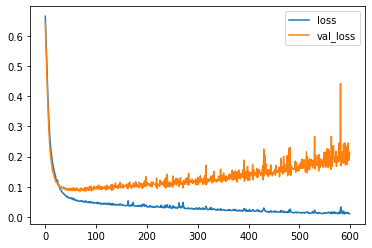

In [24]:
losses.plot()

## EARLY STOPPING USING TENSORFLOW CALLBACK

In [25]:
model1 = Sequential()

In [26]:
model1.add(Dense(30,activation='relu'))
model1.add(Dense(15, activation='relu'))

#output layer
model1.add(Dense(1, activation='sigmoid'))

In [27]:
model1.compile(optimizer='adam',loss='binary_crossentropy')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
earlystopping = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [32]:
model1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[earlystopping])

Epoch 1/500
14/14 [==============================] - 3s 58ms/step - loss: 0.6980 - val_loss: 0.6735
Epoch 2/500
14/14 [==============================] - 0s 15ms/step - loss: 0.6653 - val_loss: 0.6436
Epoch 3/500
14/14 [==============================] - 0s 14ms/step - loss: 0.6301 - val_loss: 0.5949
Epoch 4/500
14/14 [==============================] - 0s 16ms/step - loss: 0.5770 - val_loss: 0.5240
Epoch 5/500
14/14 [==============================] - 0s 15ms/step - loss: 0.5151 - val_loss: 0.4694
Epoch 6/500
14/14 [==============================] - 0s 13ms/step - loss: 0.4497 - val_loss: 0.4130
Epoch 7/500
14/14 [==============================] - 0s 15ms/step - loss: 0.4121 - val_loss: 0.3559
Epoch 8/500
14/14 [==============================] - 0s 14ms/step - loss: 0.3569 - val_loss: 0.3093
Epoch 9/500
14/14 [==============================] - 0s 15ms/step - loss: 0.2872 - val_loss: 0.2733
Epoch 10/500
14/14 [==============================] - 0s 15ms/step - loss: 0.2740 - val_loss: 0.2505

In [33]:
model1_losses = pd.DataFrame(model1.history.history)

<AxesSubplot:>

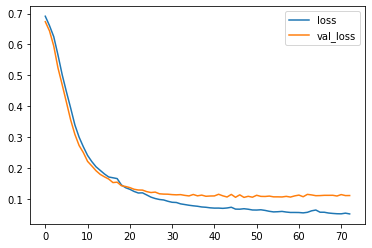

In [34]:
model1_losses.plot()

In [35]:
prediction = pd.DataFrame(model1.predict_classes(X_test))

c:\users\sabari vijay\anaconda3\envs\py3.8.5\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
truevalues = pd.DataFrame(y_test.reshape(143,1))

In [46]:
prediction = pd.concat([truevalues,prediction],axis=1)

In [48]:
prediction.columns = ['True','Prediction']

In [49]:
prediction

,True,Prediction
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
138,0,0
139,1,1
140,0,0
141,1,1


<AxesSubplot:xlabel='True', ylabel='Prediction'>

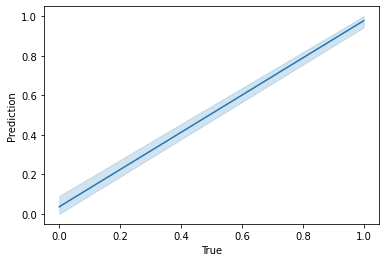

In [51]:
sns.lineplot(x='True',y='Prediction',data=prediction)

## Introducing dropout layers

In [52]:
model2 = Sequential()

In [55]:
model2.add(Dense(30,activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(15,activation='relu'))
model2.add(Dropout(0.15))

model2.add(Dense(1,activation='sigmoid'))

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
earlystopping = EarlyStopping(monitor='val_loss',mode='min',patience=15,verbose=1)

In [68]:
model2.compile(optimizer='adam',loss='binary_crossentropy')

In [69]:
model2.fit(x=X_train,y=y_train,epochs=500,callbacks=[earlystopping],validation_data=(X_test,y_test))

Epoch 1/500
14/14 [==============================] - 3s 46ms/step - loss: 0.7003 - val_loss: 0.6722
Epoch 2/500
14/14 [==============================] - 0s 12ms/step - loss: 0.6793 - val_loss: 0.6542
Epoch 3/500
14/14 [==============================] - 0s 15ms/step - loss: 0.6573 - val_loss: 0.6311
Epoch 4/500
14/14 [==============================] - 0s 12ms/step - loss: 0.6295 - val_loss: 0.5971
Epoch 5/500
14/14 [==============================] - 0s 15ms/step - loss: 0.5940 - val_loss: 0.5565
Epoch 6/500
14/14 [==============================] - 0s 12ms/step - loss: 0.5592 - val_loss: 0.5130
Epoch 7/500
14/14 [==============================] - 0s 13ms/step - loss: 0.5234 - val_loss: 0.4729
Epoch 8/500
14/14 [==============================] - 0s 13ms/step - loss: 0.4891 - val_loss: 0.4297
Epoch 9/500
14/14 [==============================] - 0s 13ms/step - loss: 0.4443 - val_loss: 0.3863
Epoch 10/500
14/14 [==============================] - 0s 15ms/step - loss: 0.4216 - val_loss: 0.3535

14/14 [==============================] - 0s 12ms/step - loss: 0.0837 - val_loss: 0.0982
Epoch 83/500
14/14 [==============================] - 0s 13ms/step - loss: 0.1047 - val_loss: 0.1003
Epoch 84/500
14/14 [==============================] - 0s 14ms/step - loss: 0.0776 - val_loss: 0.0956
Epoch 85/500
14/14 [==============================] - 0s 14ms/step - loss: 0.0828 - val_loss: 0.1016
Epoch 86/500
14/14 [==============================] - 0s 12ms/step - loss: 0.0621 - val_loss: 0.0953
Epoch 87/500
14/14 [==============================] - 0s 12ms/step - loss: 0.0565 - val_loss: 0.0973
Epoch 88/500
14/14 [==============================] - 0s 12ms/step - loss: 0.0795 - val_loss: 0.0976
Epoch 89/500
14/14 [==============================] - 0s 12ms/step - loss: 0.0723 - val_loss: 0.1033
Epoch 90/500
14/14 [==============================] - 0s 13ms/step - loss: 0.0770 - val_loss: 0.0986
Epoch 91/500
14/14 [==============================] - 0s 15ms/step - loss: 0.0959 - val_loss: 0.0937
Epo

In [70]:
losses = pd.DataFrame(model2.history.history)

<AxesSubplot:>

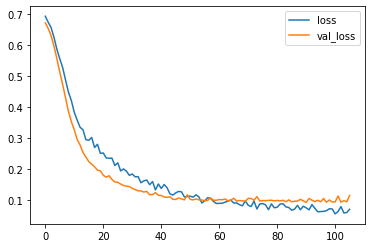

In [71]:
losses.plot()